# 3. Machine Learning

We'll use logistic regression to predict churn

## 3.1 Classification : Churn prediction project

Churn is the likelihood of losing clients due to competitors or services. This could be a binary classification 0 = no churn, 1 = churn (same like spam/not spam).

Dataset : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

## 3.2 Data Preparation

- Download the data, read it with pandas
- Look at the data
- Make column names and values look uniform
- Check if all the columns read correctly
- Check if the churn variable needs any preparation


In [5]:
!wget $data -O churn_project_week_3.csv
"""
Downloads a file from the specified URL and saves it with the given filename.

Settings:
- `data`: The URL from which to download the file.
- `churn_project_week_3.csv`: The name of the file to save the downloaded content.

Note:
- This code uses the `wget` command to download the file.
- The `-O` option specifies the output filename.
"""

--2024-10-28 21:30:25--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘churn_project_week_3.csv’

churn_project_week_ 100%[===================>] 954.59K  --.-KB/s    in 0.01s   

2024-10-28 21:30:26 (80.5 MB/s) - ‘churn_project_week_3.csv’ saved [977501/977501]



'\nDownloads a file from the specified URL and saves it with the given filename.\n\nSettings:\n- `data`: The URL from which to download the file.\n- `churn_project_week_3.csv`: The name of the file to save the downloaded content.\n\nNote:\n- This code uses the `wget` command to download the file.\n- The `-O` option specifies the output filename.\n'

In [6]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [8]:
df = pd.read_csv('churn_project_week_3.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.head().T #transposing the data frame to see all the columns

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [11]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [12]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [13]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [14]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [15]:
df.totalcharges = df.totalcharges.fillna(0)

In [16]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


In [17]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [18]:
df.churn = (df.churn == 'yes').astype(int)
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

## 3.3 Setting up the validation framework

- Perform the train/validation/test split with Scikit-Learn

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Split the original dataframe 'df' into two parts: 
# 'df_full_train' (80% of the data) and 'df_test' (20% of the data)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

# Further split 'df_full_train' into 'df_train' (75% of df_full_train) 
# and 'df_val' (25% of df_full_train)
# This means 'df_train' is 60% of the original data and 'df_val' is 20% of the original data
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [21]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4 EDA

- Check missing values
- Look at the target variable (churn)
- Look at numerical and categorical variables

In [24]:
df_full_train = df_full_train.reset_index(drop=True)

In [25]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [26]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

Churn rate is 26.99% 

In [27]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

np.float64(0.27)

In [28]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [29]:
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [30]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio
Feature importance analysis (part of EDA) - identifying which features affect our target variable

- Churn rate
- Risk ratio
- Mutual information - later

**Churn rate**

In [31]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


**Churn rate within specific groups**

In [32]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [33]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [34]:
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26996805111821087)

In [35]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [36]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

In [37]:
# Difference
# global      -       group 
# <0                    >0
# more likely         less likely
# to churn 


In [38]:
global_churn - churn_partner

np.float64(0.06493474245795922)

In [39]:
global_churn - churn_no_partner

np.float64(-0.05984095297455855)

**Risk ratio**

Risk = group / global 

if >1 more likely to churn

if <1 less likely to churn


In [40]:
churn_no_partner / global_churn

np.float64(1.2216593879412643)

People without partner is most likely to churn

In [41]:
churn_partner / global_churn

np.float64(0.7594724924338315)

```sql
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;

In [42]:
from IPython.display import display

In [43]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count']) 
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk'] = df_group['mean'] / global_churn

df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [44]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## 3.6 Feature importance: Mutual information

Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another

- https://en.wikipedia.org/wiki/Mutual_information

The higher the MSI, the feature is more relevant for churn

In [45]:
from sklearn.metrics import mutual_info_score

In [46]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

np.float64(0.0983203874041556)

In [47]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

np.float64(0.009967689095399745)

In [48]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [49]:
# Calculate mutual information scores for each categorical feature with respect to churn
mi = df_full_train[categorical].apply(mutual_info_churn_score)

# Sort the mutual information scores in descending order
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7 Feature importance: Correlation

How about numerical columns?

- Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [50]:
df_full_train.tenure.max()
"""
Finds the maximum value of the 'tenure' column in the df_full_train DataFrame.

Returns:
    int or float: The maximum value in the 'tenure' column.
"""

"\nFinds the maximum value of the 'tenure' column in the df_full_train DataFrame.\n\nReturns:\n    int or float: The maximum value in the 'tenure' column.\n"

**Positive correlation**
more tenure -> higher churn 

**Negative correlation**
more tenure -> lower churn

**Zero**: no effect on churn

In [51]:
# Calculate the absolute correlation of numerical features with the churn variable
correlation_with_churn = df_full_train[numerical].corrwith(df_full_train.churn)

# Display the correlation values
correlation_with_churn

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

Tenure has a negative correlation and monthly charges have a positive correlation.

In the context of churn prediction, correlation helps us understand the relationship between different features and the likelihood of a customer churning (leaving the service). 

- **Negative Correlation with Tenure**: This means that as the tenure (the length of time a customer has been with the company) increases, the likelihood of churn decreases. In other words, long-term customers are less likely to leave.

- **Positive Correlation with Monthly Charges**: This indicates that as the monthly charges increase, the likelihood of churn also increases. Customers who are paying higher monthly fees are more likely to leave the service.

Understanding these correlations can help in building more accurate predictive models and in devising strategies to retain customers. For example, offering loyalty rewards to long-term customers or providing discounts to those with high monthly charges might reduce churn rates.

In [52]:
"""
Calculate the mean churn rate for customers with a tenure of 2 years or less.

This function filters the dataframe `df_full_train` to include only the rows where the `tenure` column is less than or equal to 2. It then calculates and returns the mean value of the `churn` column for these filtered rows.

Returns:
    float: The mean churn rate for customers with a tenure of 2 years or less.
"""

df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [53]:
"""
Calculate the mean churn rate for customers with tenure greater than 2 months and less than or equal to 12 months.

Returns:
    float: The mean churn rate for the specified tenure range.
"""

df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [54]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

In [55]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [56]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

np.float64(0.18340943683409436)

In [57]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

## 3.8 One-hot encoding
Use Scikit-Learn to encode categorical features

In [58]:
from sklearn.feature_extraction import DictVectorizer

In [59]:
#Initialize an instance of the DictVectorizer class
dv = DictVectorizer(sparse=False)

In [60]:
dicts = df_train[['gender','contract','tenure']].iloc[:100].to_dict(orient='records')

dicts[0]

{'gender': 'female', 'contract': 'two_year', 'tenure': 72}

In [61]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [62]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male', 'tenure'],
      dtype=object)

In [63]:
# Convert the training data to a dictionary format and then transform it into a feature matrix
# Using fit_transform on the training data to learn the encoding and transform the data in one step
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

# Convert the validation data to a dictionary format and then transform it into a feature matrix
# Using transform on the validation data to apply the same encoding learned from the training data
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [64]:
train_dict[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

## 3.9 Logistic regression
- Binary classification
- Linear vs logistic regression

In [65]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [66]:
z = np.linspace(-7, 7, 51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [67]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

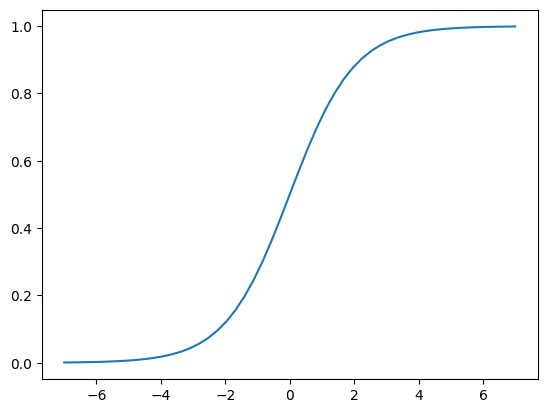

In [68]:
plt.plot(z, sigmoid(z))

### Linear Models and the Dot Product

Linear models are a fundamental class of models in machine learning and statistics. They are called "linear" because they assume a linear relationship between the input variables (features) and the output variable (target). This linear relationship is represented mathematically using the dot product.

#### What is a Dot Product?

The dot product is an algebraic operation that takes two equal-length sequences of numbers (usually vectors) and returns a single number. In the context of linear models, the dot product is used to combine the input features with the model's parameters (weights).

Mathematically, the dot product of two vectors **a** and **b** is defined as:
\[ \mathbf{a} \cdot \mathbf{b} = \sum_{i=1}^{n} a_i b_i \]

Where:
- \( \mathbf{a} \) and \( \mathbf{b} \) are vectors of length \( n \).
- \( a_i \) and \( b_i \) are the components of the vectors.

#### Linear Model Equation

In a linear model, the prediction \( \hat{y} \) is given by the dot product of the feature vector \( \mathbf{x} \) and the weight vector \( \mathbf{w} \), plus a bias term \( b \):

\[ \hat{y} = \mathbf{w} \cdot \mathbf{x} + b \]

Where:
- \( \mathbf{x} = [x_1, x_2, \ldots, x_n] \) is the feature vector.
- \( \mathbf{w} = [w_1, w_2, \ldots, w_n] \) is the weight vector.
- \( b \) is the bias term.

#### Example

Consider a simple linear model with two features:

\[ \hat{y} = w_1 x_1 + w_2 x_2 + b \]

If \( \mathbf{x} = [2, 3] \) and \( \mathbf{w} = [0.5, 1.5] \), and \( b = 1 \), the prediction \( \hat{y} \) would be:

\[ \hat{y} = (0.5 \cdot 2) + (1.5 \cdot 3) + 1 = 1 + 4.5 + 1 = 6.5 \]

#### Importance in Machine Learning

Linear models are widely used because they are simple to understand and interpret. They serve as the foundation for more complex models and are often used as a baseline in predictive modeling tasks. Despite their simplicity, they can be very effective, especially when the relationship between the features and the target is approximately linear.

In summary, linear models leverage the dot product to combine input features with model parameters, making them a powerful tool for various predictive tasks.

In [69]:
def linear_regression(xi):
    # Initialize the result with the intercept term (w0)
    result = w0
    
    # Add the contribution of each feature to the result
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [70]:
def logistic_regression(xi):
    # Initialize the score with the intercept term (w0)
    score = w0
    
    # Add the contribution of each feature to the score
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    # Apply the sigmoid function to the score to get the probability
    result = sigmoid(score)
    
    return result

## 3.10 Training logistic regression with Scikit-Learn
- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [71]:

from sklearn.linear_model import LogisticRegression

In [72]:
model = LogisticRegression(solver='lbfgs')
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
model.coef_[0].round(3)   #weights of the model

array([ 0.471, -0.174, -0.404, -0.028, -0.079,  0.063, -0.088, -0.082,
       -0.034, -0.073, -0.334,  0.315, -0.088,  0.004, -0.257,  0.14 ,
        0.01 ,  0.062, -0.088, -0.081,  0.265, -0.088, -0.284, -0.231,
        0.124, -0.164,  0.057, -0.087, -0.032,  0.072, -0.06 ,  0.14 ,
       -0.246,  0.215, -0.12 , -0.088,  0.101, -0.071, -0.088,  0.051,
        0.213, -0.088, -0.232, -0.071,  0.   ])

In [74]:
model.intercept_[0]   #intercept of the model

np.float64(-0.10819072735550182)

In [75]:
model.predict(X_train)  #hard predictions

array([0, 1, 1, ..., 1, 0, 1])

In [76]:
#For the probability
#This is a 2 dimensional array where the first column is the probability of 
# the negative class (0) and the second column is the probability of the positive class (1)  
# So we are interested in the second column probability of churn 
model.predict_proba(X_train)[:1]

array([[0.903815, 0.096185]])

In [77]:
y_pred = model.predict_proba(X_val)[:, 1]

In [78]:
churn_decision = (y_pred >= 0.5)

In [79]:
# Calculate the accuracy of the model by comparing the predicted churn decisions with the actual values
(y_val == churn_decision).mean()

np.float64(0.8026969481902059)

In [80]:
# Create a new DataFrame to store the predictions
df_pred = pd.DataFrame()

# Add the predicted probabilities of churn to the DataFrame
df_pred['probability'] = y_pred

# Add the binary predictions (0 or 1) to the DataFrame
df_pred['prediction'] = churn_decision.astype(int)

# Add the actual churn values to the DataFrame
df_pred['actual'] = y_val

In [81]:
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.009034,0,0,True
1,0.206096,0,0,True
2,0.214327,0,0,True
3,0.543724,1,1,True
4,0.215992,0,0,True
...,...,...,...,...
1404,0.310837,0,0,True
1405,0.039368,0,1,False
1406,0.136715,0,0,True
1407,0.798797,1,1,True


In [82]:
# Calculate the proportion of correct predictions
df_pred.correct.mean()

np.float64(0.8026969481902059)

In [83]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

## 3.11 Model interpretation
- Look at the coefficients
- Train a smaller model with fewer features

In [84]:
a = [0.9, 0.1, 0.8, 0.2]
b = [1, 0, 1, 0]

# The zip function pairs elements from both lists together into tuples
# It creates an iterator of tuples where the first item in each passed iterator is paired together, 
# and then the second item in each passed iterator are paired together, and so on.
c = list(zip(a, b))
c
# Convert the lists 'a' and 'b' into a dictionary using the zip function
# The zip function pairs elements from both lists together into tuples
# It creates an iterator of tuples where the first item in each passed iterator is paired together, 
# and then the second item in each passed iterator are paired together, and so on.
# The dict function then converts these tuples into key-value pairs in a dictionary
c = dict(zip(a, b))

# Print the resulting dictionary
c

{0.9: 1, 0.1: 0, 0.8: 1, 0.2: 0}

In [85]:

dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.471),
 'contract=one_year': np.float64(-0.174),
 'contract=two_year': np.float64(-0.404),
 'dependents=no': np.float64(-0.028),
 'dependents=yes': np.float64(-0.079),
 'deviceprotection=no': np.float64(0.063),
 'deviceprotection=no_internet_service': np.float64(-0.088),
 'deviceprotection=yes': np.float64(-0.082),
 'gender=female': np.float64(-0.034),
 'gender=male': np.float64(-0.073),
 'internetservice=dsl': np.float64(-0.334),
 'internetservice=fiber_optic': np.float64(0.315),
 'internetservice=no': np.float64(-0.088),
 'monthlycharges': np.float64(0.004),
 'multiplelines=no': np.float64(-0.257),
 'multiplelines=no_phone_service': np.float64(0.14),
 'multiplelines=yes': np.float64(0.01),
 'onlinebackup=no': np.float64(0.062),
 'onlinebackup=no_internet_service': np.float64(-0.088),
 'onlinebackup=yes': np.float64(-0.081),
 'onlinesecurity=no': np.float64(0.265),
 'onlinesecurity=no_internet_service': np.float64(-0.088),
 'onlinesecurity=yes':

In [86]:
#Create a small dataset for a small model 
small = ['contract', 'tenure', 'monthlycharges']

In [87]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [88]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [89]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [90]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [91]:
X_train_small = dv_small.transform(dicts_train_small)

In [92]:
model_small = LogisticRegression(solver='lbfgs')
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [93]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.4779575969847394)

In [94]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [95]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [96]:
"""
Calculates the sigmoid function for a given linear combination of features.

The function computes the sigmoid of the expression:
-2.47 + 0.97 + 50*0.027 + 5*(-0.036)

Returns:
    float: The result of the sigmoid function applied to the linear combination.
"""

#One person with a two year contract, monthly charges of $30, and tenure of 24 months
-2.47 + (-0.949) + 30 * 0.027 + 24 * (-0.036)


-3.473

In [97]:
sigmoid(_) # type: ignore

np.float64(0.030090303318277657)

## 3.12 Using the model

In [98]:
#Train data set
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [99]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [100]:
y_full_train = df_full_train.churn.values

In [101]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_full_train, y_full_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
#Train test data set
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [103]:
X_test = dv.transform(dicts_test)

In [104]:
y_pred = model.predict_proba(X_test)[:, 1]

In [105]:
churn_decision = (y_pred >= 0.5)

In [106]:
#Check accuracy
(churn_decision == y_test).mean()

np.float64(0.8147622427253371)

In [107]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [108]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [109]:
X_small = dv.transform([customer])

In [110]:
model.predict_proba(X_small)[0, 1]

np.float64(0.6585256450989782)

In [111]:
y_test[-1]

np.int64(1)

## 3.13 Summary
- Feature importance: risk, mutual information, correlation
- One-hot encoding can be implemented with `DictVectorizer`
- Logistic regression: linear model like linear regression
- Output of logistic regression: probability
- Interpretation of weights is similar to linear regression

## 3.14 Explore more

- Try to exclude least useful features
- Use scikit-learn in the project of last week
    - Re-implement train/val/test split using scikit-learn in the project from the last week
    - Also, instead of our own linear regression, use LinearRegression (not regularized) and RidgeRegression (regularized). Find the best regularization parameter for Ridge

- Other projects
    - Lead scoring - https://www.kaggle.com/ashydv/leads-dataset
    - Default prediction - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients


## 4.2 Accuracy and dummy model

Check the accuracy of dummy baselines  

In [112]:
len(y_val)

1409

In [113]:
(y_val == churn_decision).mean()

np.float64(0.6160397444996452)

In [115]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_test == churn_decision).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.247
0.05 0.489
0.10 0.603
0.15 0.674
0.20 0.710
0.25 0.744
0.30 0.766
0.35 0.782
0.40 0.789
0.45 0.801
0.50 0.815
0.55 0.816
0.60 0.815
0.65 0.806
0.70 0.796
0.75 0.777
0.80 0.762
0.85 0.754
0.90 0.753
0.95 0.753
1.00 0.753


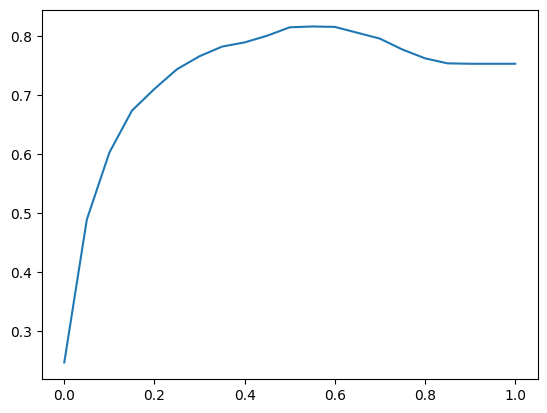

In [116]:
plt.plot(thresholds, scores)

In [117]:
from sklearn.metrics import accuracy_score

In [118]:
accuracy_score(y_val, churn_decision)

0.7260468417317246

In [119]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.405
0.10 0.452
0.15 0.480
0.20 0.505
0.25 0.534
0.30 0.537
0.35 0.561
0.40 0.575
0.45 0.590
0.50 0.616
0.55 0.626
0.60 0.648
0.65 0.674
0.70 0.692
0.75 0.709
0.80 0.720
0.85 0.725
0.90 0.726
0.95 0.726
1.00 0.726


In [120]:
from collections import Counter

In [121]:
Counter(y_pred >= 1)

Counter({np.False_: 1409})

## 4.3 Confusion table 

Differete types of errors and correct decisions

Arranging them in a table

In [122]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [123]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [126]:
predict_positive[:5]

array([False, False, False, False, False])

In [127]:
actual_positive

array([False, False, False, ..., False,  True,  True])

In [129]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [133]:
tn, tp

(np.int64(784), np.int64(84))

In [131]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [132]:
fp, fn

(np.int64(239), np.int64(302))

In [135]:
confusion_matrix = np.array([ [tn, fp], [fn, tp] ])
confusion_matrix

array([[784, 239],
       [302,  84]])

In [136]:
(784+84)/1409

0.6160397444996452

## 4.4 Precision and recall
Precision is the fraction of positive predictions that are correct

True positives / # positives

p = tp / (tp + fp)

In [138]:
p = tp / (tp + fp)
p

np.float64(0.26006191950464397)

In [141]:
tp + fp

np.int64(323)

Recall

Fraction of correctly identified positive examples

tp / # positives observations

tp / (tp + fn)


In [139]:
r = tp / (tp + fn)
r

np.float64(0.21761658031088082)

In [140]:
tp + fn

np.int64(386)

## 4.5 ROC Curves

### TPR and FPR

True positive rate and false positive rate

In [142]:
tpr = tp / (tp + fn)
tpr

np.float64(0.21761658031088082)

In [144]:
r   #same value as recall

np.float64(0.21761658031088082)

In [143]:
fpr = fp / (fp + tn)
fpr

np.float64(0.23362658846529813)

In [ ]:
threadsholds = np.linspace(0, 1, 101) #101 points between 0 and 1
for t in threadsholds:
    